In [251]:
import pickle
import random
import gym
import gym.spaces
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from gym.envs.registration import register

register(
    id='AppEnvironment-v0',
    entry_point='RLSimulation:AppEnvironment',
)

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment AppEnvironment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


In [252]:
def generate_happiness_score(readingtime, activitytime, screentime, modeltype):
        model_default = pickle.load(open('modelh_'+str(modeltype)+'.pkl', 'rb'))
        df = pd.DataFrame({'screentime':[screentime], 'activitytime':[activitytime], 'readingtime':[readingtime]})
        res = model_default.predict(df).astype(int)[0]
        return max(1, min(100,res)) # Make a prediction

        

In [253]:
class AppEnvironment(gym.Env):

    model_type = 4

    def __init__(self):
        self.observation_space = gym.spaces.Box(low=0, high=100, shape=(5,), dtype=float)
        #['readingtime', 'activitytime', 'screentime', 'self reported happiness']
        self.observation = np.array([0.0, 0.0, 5.0, 0.0, float(generate_happiness_score(0, 0, 5, self.model_type))])
        self.action_space = gym.spaces.Discrete(10)
        #['increase_reading', 'increase_activity', 'increase_screentime', 'decrease_reading', 'decrease_activity', 'decrease_screentime', 'self reported happiness 0', 'self reported happiness 1', 'self reported happinness 2', 'self reported happiness 3']

    
    def reset(self):
        self.observation = np.array([0.0, 0.0, 5.0,0.0, float(generate_happiness_score(0, 0, 5, self.model_type))])
        return self.observation

    def step(self, action):
        # Update the state based on the action
        new_obersevation = self.observation.copy()
        done = False
        reward = 0

        #print("Action: ", action, "Obersevation: ", new_obersevation)

        if action == 0:
            new_obersevation[0] += 0.5
        elif action == 1:
            new_obersevation[1] += 0.5
        elif action == 2:
            new_obersevation[2] += 0.5
        elif action == 3:
            new_obersevation[0] -= 0.5
        elif action == 4:
            new_obersevation[1] -= 0.5
        elif action == 5:
            new_obersevation[2] -= 0.5
        elif action == 6:
            new_obersevation[3] = 1
        elif action == 7:
            new_obersevation[3] = 2
        elif action == 8:
            new_obersevation[3] = 3
        elif action == 9:
            new_obersevation[3] = 4
        
        #print("New obersevation: ", new_obersevation)


        if new_obersevation[0] < 0 or new_obersevation[1] < 0 or new_obersevation[2] < 0:
            #print("Negative values")
            reward -= 1000
            new_obersevation = [max(0,x) for x in new_obersevation]

        
        if sum(new_obersevation[0:3]) > 24:
            #print("Sum of all activities is greater than 24")
            reward -= 1000

        if sum(new_obersevation[0:3]) <= 24:
            self.observation = new_obersevation

        new_happiness = generate_happiness_score(self.observation[0], self.observation[1], self.observation[2], self.model_type)
        new_happiness = 0.75 * new_happiness + 0.25 * 25 * self.observation[3]
        reward = new_happiness - self.observation[4]
        
        #do not make big changes in happiness
        if reward >= 20:
            reward -= 10
        
        self.observation[4] = new_happiness

        if new_happiness > 95:
            done = True
            #print("Happiness is greater than 95")
            reward += 100

        #print("Action: ", action, "Obersevation: ", self.observation, "Reward: ", reward, "Done: ", done)

        info = {}
        return self.observation, reward, done, info

In [254]:
model_list = []

for i in range(9):

    environment = AppEnvironment()
    environment.model_type = i
    model = PPO('MlpPolicy', env=environment, learning_rate=0.0001)
    model.learn(total_timesteps=10000, progress_bar=True)
    model_list.append(model)

Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Output()

/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


## Evaluate the model

In [255]:
eval_env = AppEnvironment()
mean_reward, std_reward = evaluate_policy(model_list[4], eval_env, n_eval_episodes=1, deterministic=False)
print(f"Mean reward: {mean_reward} +/- {std_reward}")

Mean reward: 196.0 +/- 0.0


/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/andrei/ETH/wunderkind/WunderkindBackend/.venv/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


## Simulating the Environment

In [256]:
def getModelType(readingtime, activitytime):
    ideal_readingtimes = [1, 2, 3]
    ideal_activitytimes = [1, 2, 3]

    min_distance = 100000
    for i in range(9):
        distance = abs(readingtime - ideal_readingtimes[i//3]) + abs(activitytime - ideal_activitytimes[i%3])
        #print("Distance for "+str(i)+": ", distance)
        if distance < min_distance:
            min_distance = distance
            modeltype = i

    return modeltype

In [257]:
happiness_score=[]

mean_finish_time_diff = 0

for i in range(100):

    tmp_arr = []
    obs = eval_env.reset()

    ## assesment period
    assesment_reading_time = 0
    assesment_activity_time = 0

    random_reading_time = round(random.random(),1)
    random_activity_time = round(random.random(),1)

    eval_env.observation = np.array([random_reading_time, random_activity_time, 5.0, 0, float(generate_happiness_score(0, 0, 5, eval_env.model_type))])

    for j in range(10):

        action = random.randint(0,4)

        obs, rewards, dones, info = eval_env.step(action)
        #print("Observation: ", obs)
        tmp_arr.append(obs[4])
        assesment_reading_time += obs[0]
        assesment_activity_time += obs[1]
        if dones:
            print("Episode finished after {} timesteps".format(j+1))
            break
    

    if dones:
        continue
    
    assesment_reading_time /=10
    assesment_activity_time /=10
    eval_env.model_type = getModelType(assesment_reading_time, assesment_activity_time)

    tmp_arr_general = tmp_arr.copy()
    tmp_obs = obs.copy()
    
    
    ## with individual model ##

    for j in range(100):
        # Best Suggestions
        action, _states = model_list[eval_env.model_type].predict(obs)

        # Child will sometimes consider suggestions of app or not
        action = random.randint(2,4) if random.random() < 0.25 else action

        obs, rewards, dones, info = eval_env.step(action)
        print("Observation: ", obs)
        tmp_arr.append(obs[4])
        if dones:
            print("Episode finished after {} timesteps".format(j+1))
            mean_finish_time_diff += j+1
            break
    happiness_score.append(tmp_arr)

    ## with general model ##

    eval_env.reset()
    eval_env.observation = tmp_obs
    eval_env.model_type = 4
    for j in range(100):
        # Best Suggestions
        action, _states = model_list[4].predict(obs)

        # Child will sometimes consider suggestions of app or not
        action = random.randint(2,4) if random.random() < 0.25 else action

        obs, rewards, dones, info = eval_env.step(action)
        print("Observation: ", obs)
        tmp_arr_general.append(obs[4])
        if dones:
            print("Episode finished after {} timesteps".format(j+1))
            mean_finish_time_diff -= j+1
            break
    happiness_score.append(tmp_arr_general)

print("Mean finish time difference: ", mean_finish_time_diff/100)
    


Observation:  [0.0, 0.5, 6.0, 0, 18.75]
Observation:  [0, 0.5, 6.0, 0, 18.75]
Observation:  [0, 0.5, 6.0, 3, 37.5]
Observation:  [0, 1.0, 6.0, 3, 56.25]
Observation:  [0.5, 1.0, 6.0, 3, 75.0]
Observation:  [0.5, 1.0, 6.0, 4, 81.25]
Observation:  [1.0, 1.0, 6.0, 4, 97.75]
Episode finished after 7 timesteps
Observation:  [0.5, 0.5, 6.5, 0, 13.5]
Observation:  [1.0, 0.5, 6.5, 0, 27.75]
Observation:  [1.0, 0.5, 7.0, 0, 25.5]
Observation:  [1.0, 0.0, 7.0, 0, 15.0]
Observation:  [0.5, 0.0, 7.0, 0, 1.5]
Observation:  [0.5, 0, 7.0, 0, 1.5]
Observation:  [0.5, 0, 7.0, 3, 20.25]
Observation:  [0.5, 0, 7.0, 3, 20.25]
Observation:  [0.5, 0.5, 7.0, 3, 30.75]
Observation:  [0.5, 1.0, 7.0, 3, 41.25]
Observation:  [0.5, 0.5, 7.0, 3, 30.75]
Observation:  [0.5, 0.5, 7.0, 4, 37.0]
Observation:  [0.5, 0.5, 7.0, 3, 30.75]
Observation:  [1.0, 0.5, 7.0, 3, 44.25]
Observation:  [1.0, 0.5, 7.0, 4, 50.5]
Observation:  [1.0, 0.5, 7.5, 4, 49.0]
Observation:  [1.0, 1.0, 7.5, 4, 59.5]
Observation:  [1.0, 1.5, 7.5, 

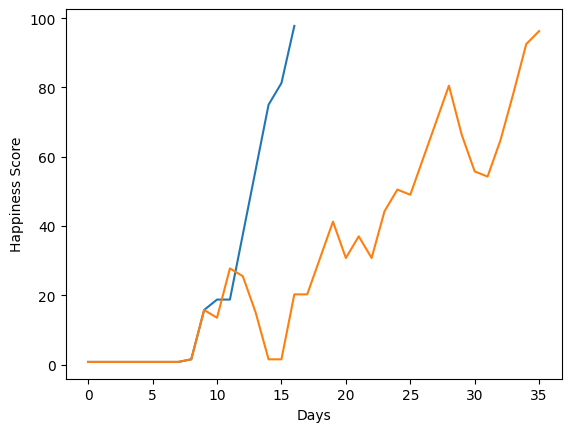

In [258]:
for i in range(2):
    plt.plot(happiness_score[i])
plt.ylabel('Happiness Score')
plt.xlabel('Days')
plt.show()
